In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
                         
# Configure plot settings
%matplotlib inline
sns.set_style('whitegrid')  # Changed from plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [10, 6]

# Load the dataset
data_path = '../data/processed/cleaned_insurance_data.csv'
df = pd.read_csv(data_path)
                
# Convert categorical columns to category type
categorical_columns = ['Gender', 'Driving_Experience', 'Vehicle_Type', 'Region', 'Accident']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Display first few rows
df.head()


,Age,Gender,Driving_Experience,Vehicle_Type,Previous_Accidents,Region,Annual_Mileage,Premium,Accident
0,56,1,38,3,0,1,18524.705332,358.826955,0
1,69,0,52,2,0,1,6495.821865,601.053844,1
2,46,1,27,0,0,1,11184.105493,603.559907,0
3,32,1,16,1,0,0,19590.905892,656.446490,1
4,60,0,43,0,1,1,18183.213256,589.389243,0


## Relationship Analysis with Target Variable (Accident)

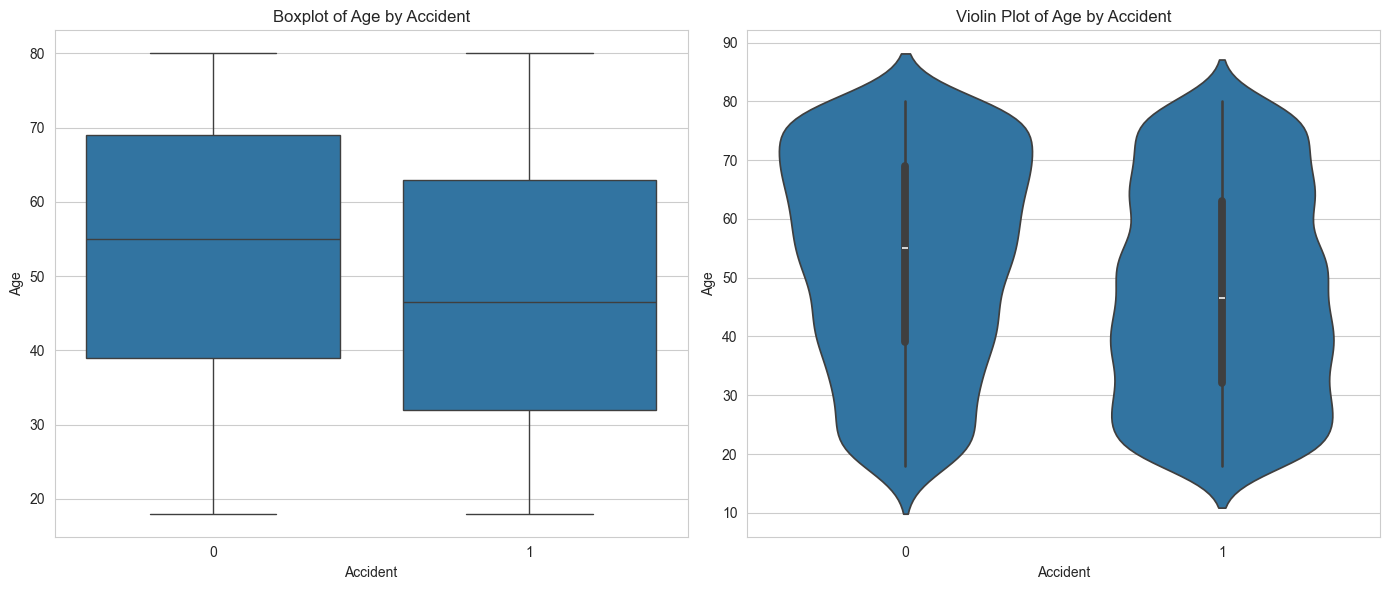

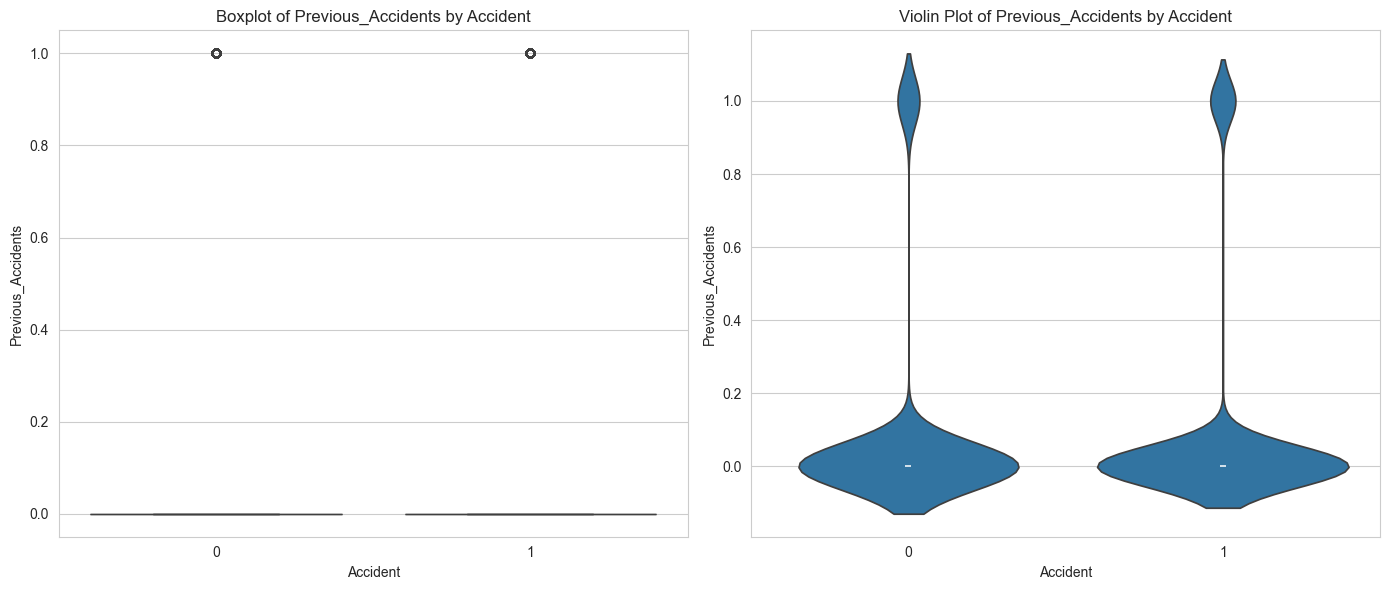

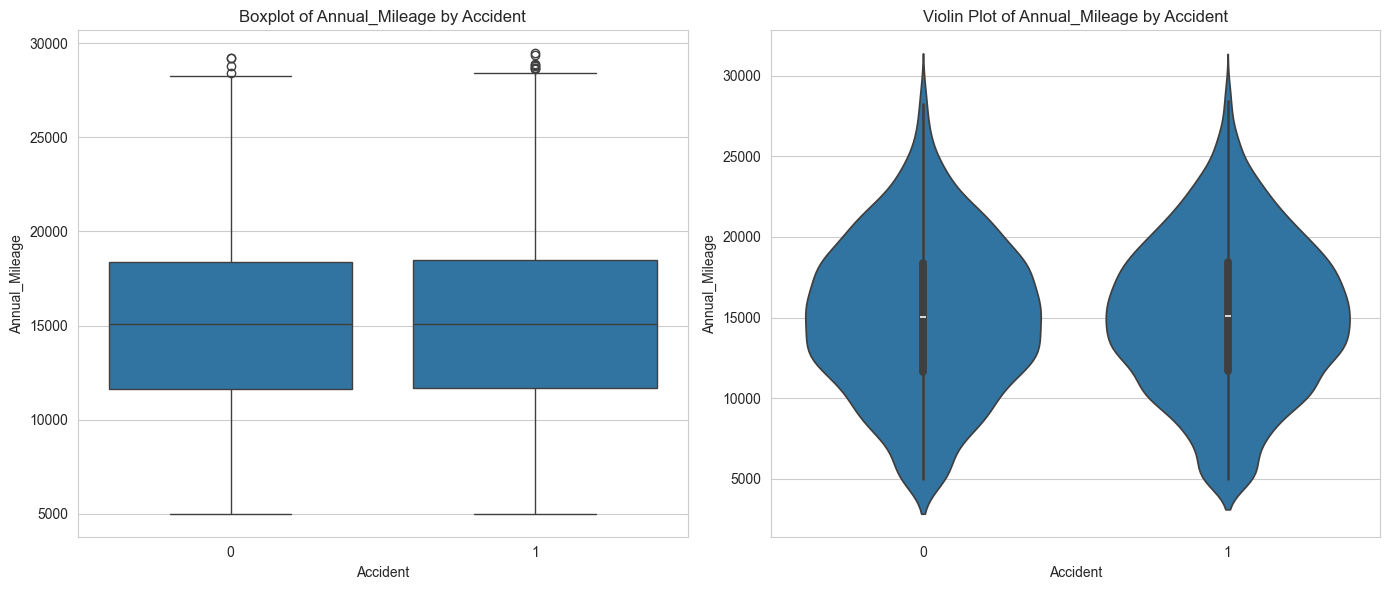

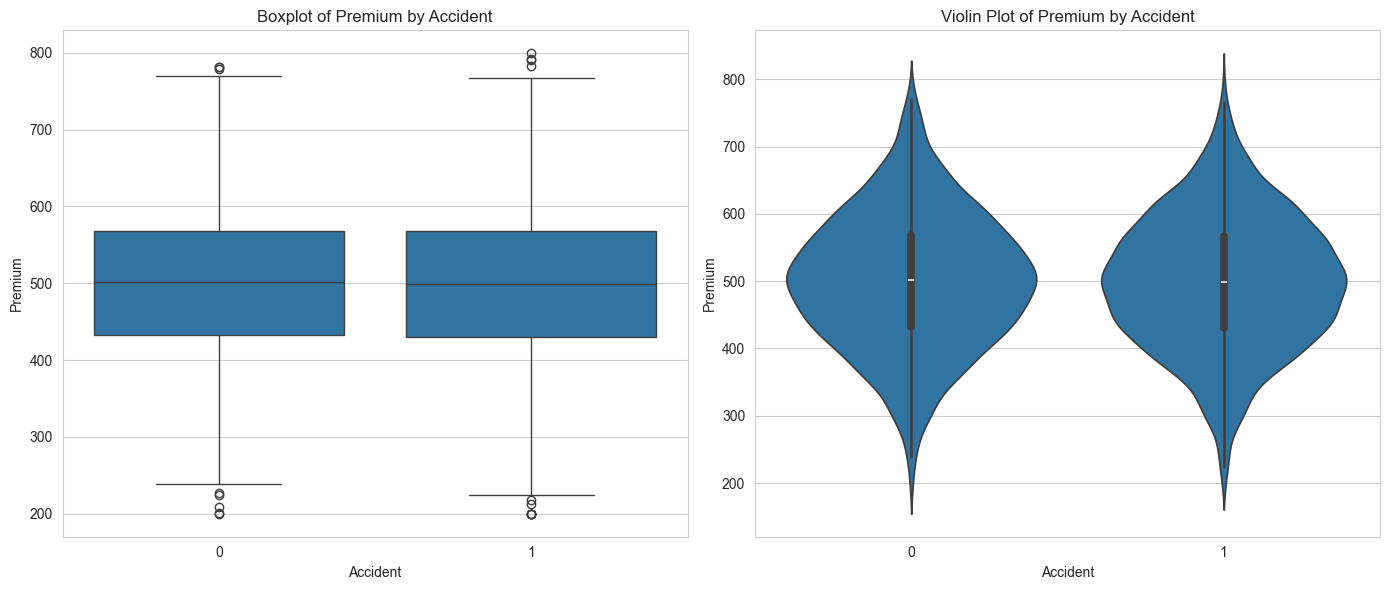

In [12]:

# Defining the target variable
target_var = 'Accident'

# Numerical columns for analysis (excluding Accident since it's categorical)
numerical_columns = ['Age', 'Previous_Accidents', 'Annual_Mileage', 'Premium']

# Boxplots and Violinplots for numerical columns against the target variable
for col in numerical_columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=target_var, y=col, data=df)
    plt.title(f'Boxplot of {col} by {target_var}')
    plt.xlabel(target_var)
    plt.ylabel(col)

    plt.subplot(1, 2, 2)
    sns.violinplot(x=target_var, y=col, data=df)
    plt.title(f'Violin Plot of {col} by {target_var}')
    plt.xlabel(target_var)
    plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()


## Bar Plots for Categorical Variables by Target Variable

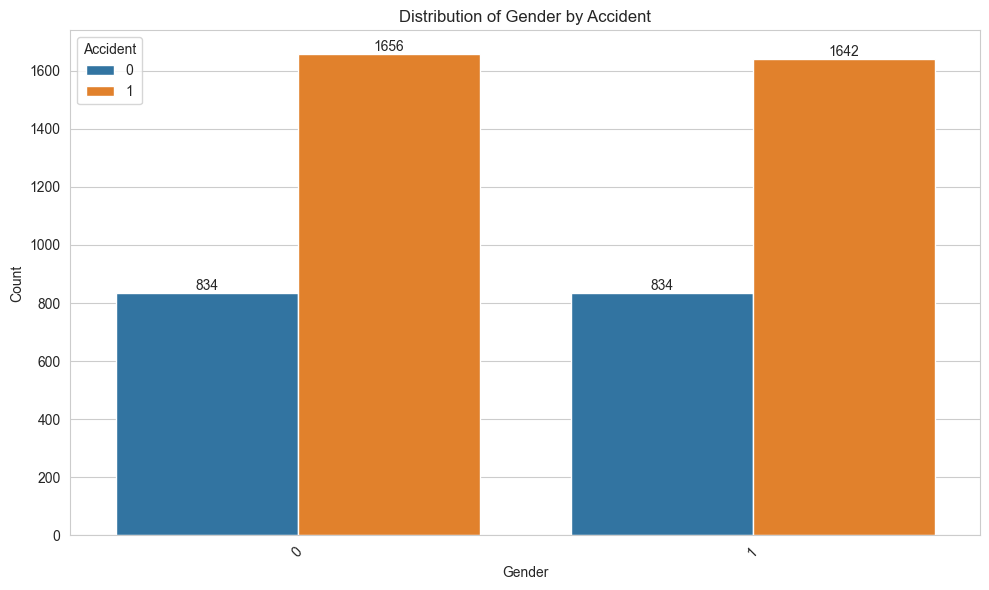

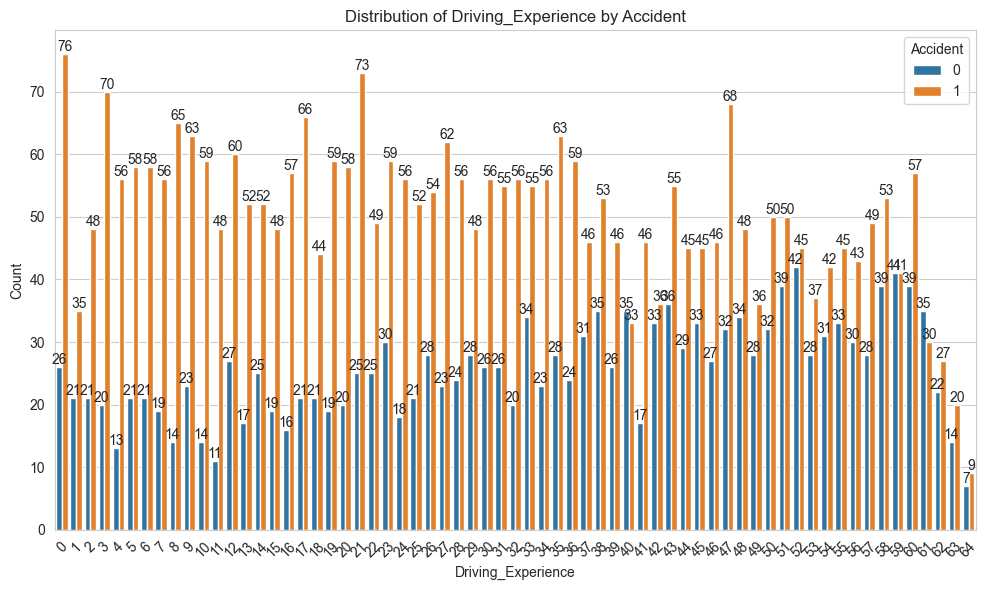

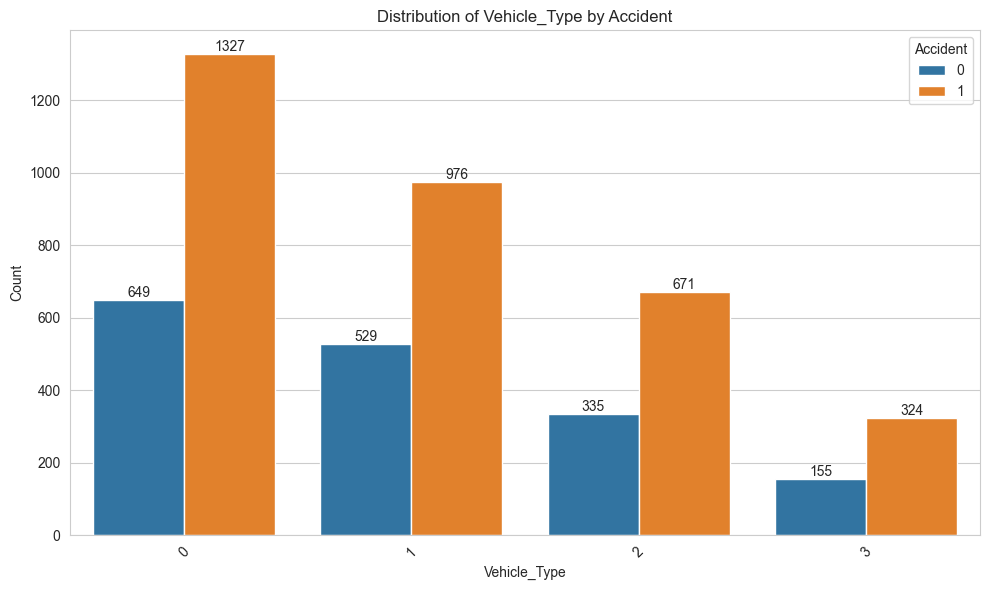

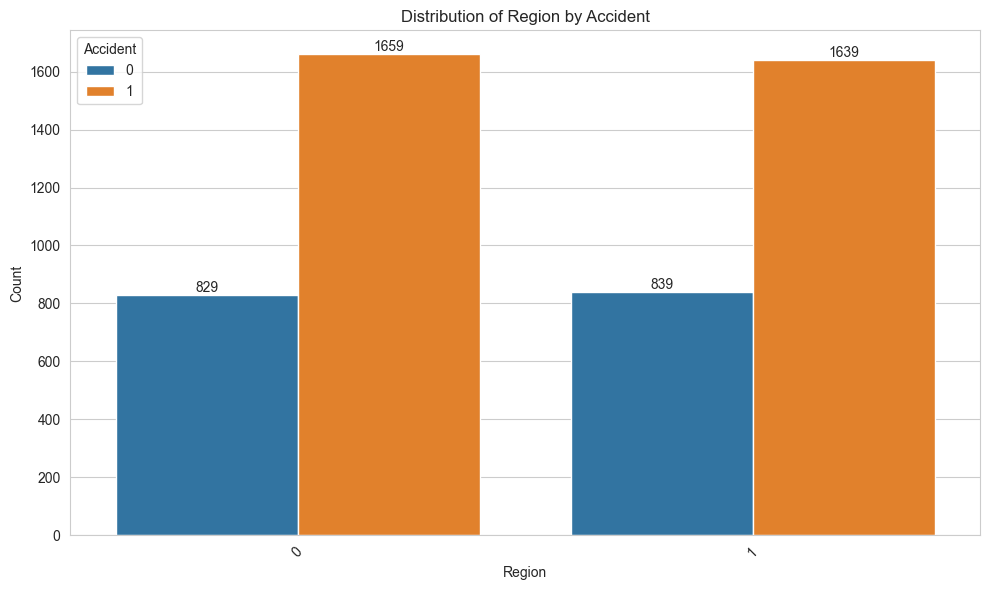

In [13]:

# Categorical columns for analysis (excluding Accident since it's the target)
categorical_columns = ['Gender', 'Driving_Experience', 'Vehicle_Type', 'Region']
target_var = 'Accident'

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=col, hue=target_var)
    
    # Rotate x-labels if needed
    plt.xticks(rotation=45)
    
    # Add title and labels
    plt.title(f'Distribution of {col} by {target_var}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Add value labels on top of bars
    for container in ax.containers:
        ax.bar_label(container)
    
    plt.tight_layout()
    plt.show()


## Crosstabulation Analysis for Categorical Variables

In [14]:

# Crosstabs for each categorical variable with the target variable
for col in categorical_columns:
    print(f"\nCrosstab for {col} vs {target_var}:\n")
    
    # Raw counts
    ct_counts = pd.crosstab(df[col], df[target_var])
    print("Counts:")
    print(ct_counts)
    print("\n")
    
    # Percentages
    ct_pct = pd.crosstab(df[col], df[target_var], normalize='index') * 100
    print("Percentages (%):")
    print(ct_pct.round(2))
    print("\n" + "="*50)



Crosstab for Gender vs Accident:

Counts:
Accident    0     1
Gender             
0         834  1656
1         834  1642


Percentages (%):
Accident      0      1
Gender                
0         33.49  66.51
1         33.68  66.32


Crosstab for Driving_Experience vs Accident:

Counts:
Accident             0   1
Driving_Experience        
0                   26  76
1                   21  35
2                   21  48
3                   20  70
4                   13  56
...                 ..  ..
60                  39  57
61                  35  30
62                  22  27
63                  14  20
64                   7   9

[65 rows x 2 columns]


Percentages (%):
Accident                0      1
Driving_Experience              
0                   25.49  74.51
1                   37.50  62.50
2                   30.43  69.57
3                   22.22  77.78
4                   18.84  81.16
...                   ...    ...
60                  40.62  59.38
61                  

## Correlation Analysis

In [15]:

# Calculate correlation matrix for numerical variables
correlation_matrix = df.corr()

# Display correlation matrix
correlation_matrix


,Age,Gender,Driving_Experience,Vehicle_Type,Previous_Accidents,Region,Annual_Mileage,Premium,Accident
Age,1.000000,-0.024242,0.996982,0.002106,-0.006184,-0.007050,-0.003705,0.001095,-0.146445
Gender,-0.024242,1.000000,-0.024354,0.010942,0.004395,-0.002019,0.014115,-0.012049,-0.002005
Driving_Experience,0.996982,-0.024354,1.000000,0.001290,-0.007014,-0.007237,-0.004323,0.001781,-0.145120
Vehicle_Type,0.002106,0.010942,0.001290,1.000000,-0.011227,-0.012576,-0.014298,-0.006433,-0.000013
Previous_Accidents,-0.006184,0.004395,-0.007014,-0.011227,1.000000,-0.004269,-0.002371,0.019451,0.000718
Region,-0.007050,-0.002019,-0.007237,-0.012576,-0.004269,1.000000,-0.017085,0.002318,-0.005696
Annual_Mileage,-0.003705,0.014115,-0.004323,-0.014298,-0.002371,-0.017085,1.000000,-0.010434,0.005339
Premium,0.001095,-0.012049,0.001781,-0.006433,0.019451,0.002318,-0.010434,1.000000,-0.010156
Accident,-0.146445,-0.002005,-0.145120,-0.000013,0.000718,-0.005696,0.005339,-0.010156,1.000000


## Heatmap of Correlation Matrix

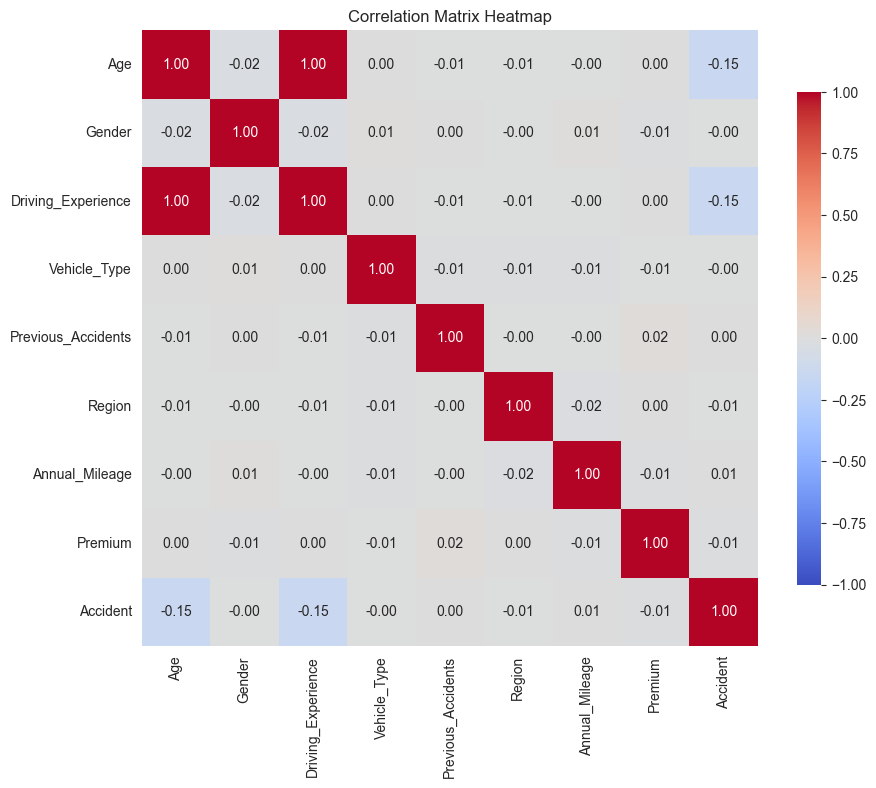

In [16]:

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix Heatmap')
plt.show()
